# Extended modeling for NBA Dataset

In the extended modeling section we will evaluate how the Random Forest Regression model compared to the Linear Regression Models. We will evaluate the differences in r-squared, MAPE, RMSE between the a parameter-tuned Random Forest Regression model and the Linear Regression model ran in the previous section. 

#### Import necessary functions and packages

In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from random import sample
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
games = pd.read_csv('C:/Users/michael.thabane/Documents/Springboard/Capstone2/nba-games/games.csv')
games_details = pd.read_csv('C:/Users/michael.thabane/Documents/Springboard/Capstone2/nba-games/games_details.csv')
players = pd.read_csv('C:/Users/michael.thabane/Documents/Springboard/Capstone2/nba-games/players.csv')
standings = pd.read_csv('C:/Users/michael.thabane/Documents/Springboard/Capstone2/nba-games/ranking.csv')

In [2]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#### importing the data set from the data wrangling notebook

In [4]:
final_boxscore = pd.read_csv('C:/Users/michael.thabane/Documents/Springboard/Capstone2/final_boxscore.csv')

In [5]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#### Isolating Lebron James career statistics

In [6]:
lebron_stats = final_boxscore.loc[final_boxscore['PLAYER_ID'] == 2544]
lebron_train2 = lebron_stats.iloc[91:]
lebron_test2 = lebron_stats.iloc[61:91]
lebron_train2_drop = lebron_train2.dropna()
y_train = lebron_train2_drop['PTS']
X_train = lebron_train2_drop[['PTSL5','PTSL3','MINL5','FGML5','FGAL5','FG_PCTL5','FG3ML5','FG3AL5','FG3_PCTL5','FTML5',
                       'FTAL5','FT_PCTL5','STLL5','PLUS_MINUSL5','TOT_PTSL5','DAYSOFF','YEAR']]
lebron_model_test2_drop = lebron_test2.dropna()
lebron_model_test2_drop = lebron_model_test2_drop[['PTSL5','PTSL3','MINL5','FGML5','FGAL5','FG_PCTL5','FG3ML5','FG3AL5',
                                                   'FG3_PCTL5','FTML5','FTAL5','FT_PCTL5','STLL5','PLUS_MINUSL5',
                                                   'TOT_PTSL5','DAYSOFF','YEAR']]

#### Fitting the model to the default parameter random forest regressor

First we will run the model using the default parameters for the Random Forrest Regressor. The important parameter values in the default regressor:

- n estimators = 10  
- max depth = None
- min samples split = 2
- min samples leaf = 1

In [7]:
randomforest = RandomForestRegressor()
randomforest.fit(X_train,y_train)

C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [8]:
act = lebron_test2.dropna()
y_actual = act['PTS']
y_pred = randomforest.predict(lebron_model_test2_drop)

In [9]:
RMSE = np.sqrt(mean_squared_error(y_actual,y_pred))
r2 = r2_score(y_actual,y_pred)
MAPE = mean_absolute_percentage_error(y_actual,y_pred)
print(' RMSE =', RMSE,'\n','r squared = ', r2,'\n','MAPE = ', MAPE)

 RMSE = 6.243823614847983 
 r squared =  -0.07995937086398475 
 MAPE =  21.045833502218215


R-squared value is negative meaning the default model actually performs worse than using the points avg as a predictor. Also RMSE is about 0.7 higher than the baseline regression model. MAPE is 3 percent higher than the baseline regression model so clearly from this we know that the parameters need to be tuned before comparing the results to the baseline regression model.

#### Parameter tuning the Random Forest Regressor for find the optimal parameters for the best performance

In [10]:
param_grid_RF = {'n_estimators': np.arange(100,1000,100), 'max_depth': np.arange(1,20,4), 
                 'min_samples_split': np.arange(2,21,5), 'min_samples_leaf': np.arange(1,15,2)}
RF_tune = GridSearchCV(randomforest,param_grid_RF)
RF_tune.fit(X_train,y_train)
print('Best n estimator: ', RF_tune.best_params_['n_estimators'])
print('Best max depth: ', RF_tune.best_params_['max_depth'])
print('Best min sample split: ', RF_tune.best_params_['min_samples_split'])
print('Best min sample leaf: ', RF_tune.best_params_['min_samples_leaf'])
print('Best Score: ', RF_tune.best_score_)

C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best n estimator:  700
Best max depth:  5
Best min sample split:  7
Best min sample leaf:  11
Best Score:  0.009297907545078237


In [11]:
best_RF = RandomForestRegressor(n_estimators=RF_tune.best_params_['n_estimators'],
                                max_depth=RF_tune.best_params_['max_depth'],
                                min_samples_split=RF_tune.best_params_['min_samples_split'],
                                min_samples_leaf=RF_tune.best_params_['min_samples_leaf'])
best_RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=11, min_samples_split=7,
                      min_weight_fraction_leaf=0.0, n_estimators=700,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [12]:
y_pred_best = best_RF.predict(lebron_model_test2_drop)

In [13]:
RMSE_1 = np.sqrt(mean_squared_error(y_actual,y_pred_best))
r2_1 = r2_score(y_actual,y_pred_best)
MAPE_1 = mean_absolute_percentage_error(y_actual,y_pred_best)
print(' RMSE =', RMSE_1,'\n','r squared = ', r2_1,'\n','MAPE = ', MAPE_1)

 RMSE = 6.069103756861786 
 r squared =  -0.02036438087963477 
 MAPE =  19.875482182850945


The parameter tuned Random Forest Regressor model on Lebron's data performs with a negative r-square value which is slightly close to 0; meaning that the model performs similar but worse to using the total points average as a predictor. When comparing this tuned model to the baseline model with the same training and test set (lebron last 30 games of 2018) we notice that Random Forrest Regressor performs similar but worse than the Linear Regession model and all three metrics (RMSE, r-squared, MAPE) almost equivalent. Below we will examine the difference between the actual and predicted values of the model.  

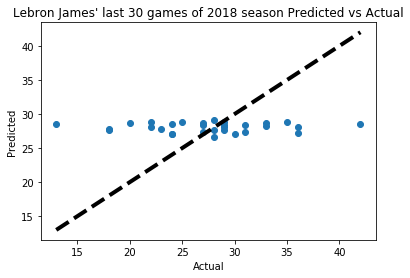

In [14]:
plt.scatter(y_actual,y_pred_best)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Lebron James' last 30 games of 2018 season Predicted vs Actual")
plt.show()

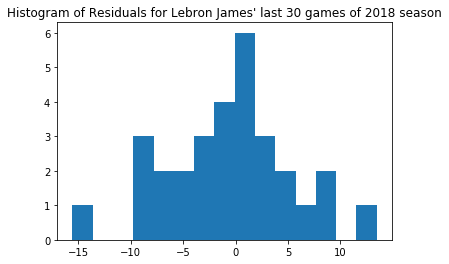

In [15]:
residuals = y_actual - y_pred_best
plt.title("Histogram of Residuals for Lebron James' last 30 games of 2018 season")
plt.hist(residuals, bins=15)
plt.show()

Excluding the two outlier predictions we know that most of the predictions will fall within 8-10 points of the predicted value. Therefore when making props picks for any players who's player props is not in the prediction range of 95% we can make a confident decision whether that player will go over or under for points scored.

#### Fitting the model to the default parameters of XGBoost algorithm

In [16]:
xgboost = XGBRegressor()
xgboost.fit(X_train,y_train)

[16:13:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [17]:
y_pred_xgb = xgboost.predict(lebron_model_test2_drop)

In [18]:
RMSE_xg = np.sqrt(mean_squared_error(y_actual,y_pred_xgb))
r2_xg = r2_score(y_actual,y_pred_xgb)
MAPE_xg = mean_absolute_percentage_error(y_actual,y_pred_xgb)
print(' RMSE =', RMSE_xg,'\n','r squared = ', r2_xg,'\n','MAPE = ', MAPE_xg)

 RMSE = 6.233158243357091 
 r squared =  -0.07627306220743701 
 MAPE =  21.13758766584662


#### Running the random forest regressor on Giannis' stats

Now need to run the model on Giannis as the performance of the model will vary for each player. We will compare the performance of the Random Forest Regressor to the Linear Regression model on the same test and training set.

In [19]:
giannis_stats = final_boxscore.loc[final_boxscore['PLAYER_ID'] == 203507]
giannis_stats.loc[giannis_stats['SEASON'] == 2019]
giannis_train = giannis_stats.iloc[30:]
giannis_test = giannis_stats.iloc[:30]
giannis_train_drop = giannis_train.dropna()
y_ga = giannis_train_drop['PTS']
X_ga = giannis_train_drop[['PTSL5','PTSL3','MINL5','FGML5','FGAL5','FG_PCTL5','FG3ML5','FG3AL5','FG3_PCTL5','FTML5',
                       'FTAL5','FT_PCTL5','STLL5','PLUS_MINUSL5','TOT_PTSL5','DAYSOFF','YEAR']]

In [20]:
randomforest_ga = RandomForestRegressor()
randomforest_ga.fit(X_ga,y_ga)
Y_actual_ga = giannis_test['PTS']
giannis_model_test_drop = giannis_test.dropna()
giannis_model_test_drop = giannis_model_test_drop[['PTSL5','PTSL3','MINL5','FGML5','FGAL5','FG_PCTL5','FG3ML5','FG3AL5',
                                                   'FG3_PCTL5','FTML5','FTAL5','FT_PCTL5','STLL5','PLUS_MINUSL5',
                                                   'TOT_PTSL5','DAYSOFF','YEAR']]
Y_pred_ga = randomforest_ga.predict(giannis_model_test_drop)

C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
RMSE_ga = np.sqrt(mean_squared_error(Y_actual_ga,Y_pred_ga))
r2_ga = r2_score(Y_actual_ga,Y_pred_ga)
MAPE_ga = mean_absolute_percentage_error(Y_actual_ga,Y_pred_ga)
print(' RMSE =', RMSE_ga,'\n','r squared = ', r2_ga,'\n','MAPE = ', MAPE_ga)

 RMSE = 8.342621490474881 
 r squared =  -0.3492891607789075 
 MAPE =  25.250721098678735


In [22]:
param_grid_RF_ga = {'n_estimators': np.arange(100,1000,100), 'max_depth': np.arange(1,20,4), 
                 'min_samples_split': np.arange(2,21,5), 'min_samples_leaf': np.arange(1,15,2)}
RF_tune_ga = GridSearchCV(randomforest_ga,param_grid_RF_ga)
RF_tune_ga.fit(X_ga,y_ga)
print('Best n estimator: ', RF_tune_ga.best_params_['n_estimators'])
print('Best max depth: ', RF_tune_ga.best_params_['max_depth'])
print('Best min sample split: ', RF_tune_ga.best_params_['min_samples_split'])
print('Best min sample leaf: ', RF_tune_ga.best_params_['min_samples_leaf'])
print('Best Score: ', RF_tune_ga.best_score_)

C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best n estimator:  100
Best max depth:  5
Best min sample split:  17
Best min sample leaf:  3
Best Score:  -0.49354827888438363


In [23]:
best_RF_ga = RandomForestRegressor(n_estimators=RF_tune_ga.best_params_['n_estimators'],
                                   max_depth=RF_tune_ga.best_params_['max_depth'],
                                   min_samples_split=RF_tune_ga.best_params_['min_samples_split'],
                                   min_samples_leaf=RF_tune_ga.best_params_['min_samples_leaf'])
best_RF_ga.fit(X_ga,y_ga)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=17,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [24]:
y_pred_best_ga = best_RF_ga.predict(lebron_model_test2_drop)

In [25]:
RMSE_ga_1 = np.sqrt(mean_squared_error(Y_actual_ga,y_pred_best_ga))
r2_ga_1 = r2_score(Y_actual_ga,y_pred_best_ga)
MAPE_ga_1 = mean_absolute_percentage_error(Y_actual_ga,y_pred_best_ga)
print(' RMSE =', RMSE_ga_1,'\n','r squared = ', r2_ga_1,'\n','MAPE = ', MAPE_ga_1)

 RMSE = 7.667378481162914 
 r squared =  -0.13970841582069826 
 MAPE =  25.208935493860736


The parameter tuned Random Forest Regressor model on Giannis' data performs with a negative r-square value so the model performs worse than using the total points average as a predictor. When comparing this tuned model to the baseline model with the same training and test set (Giannis last 30 games of 2019) we notice that Random Forrest Regressor performs worse than the Linear Regession model for all three metrics (RMSE, r-squared, MAPE). Since this model is not a good predictor for Giannis it is fair to say that depending on the size of the dataset for each player the Random Forest Regressor will not perform as well as a Linear Regression model. Below we will show how poor the performance of the model is by looking at the actual vs predicted values.

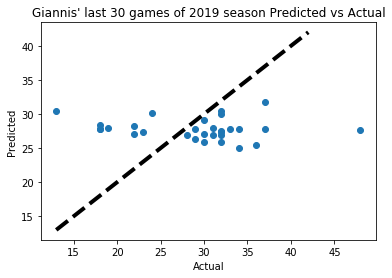

In [26]:
plt.scatter(Y_actual_ga,y_pred_best_ga)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Giannis' last 30 games of 2019 season Predicted vs Actual")
plt.show()

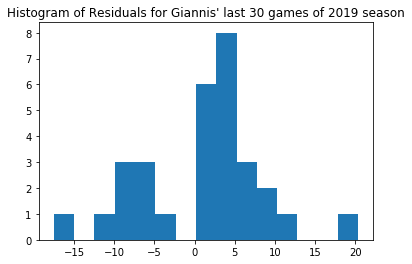

In [27]:
residuals = Y_actual_ga - y_pred_best_ga
plt.title("Histogram of Residuals for Giannis' last 30 games of 2019 season")
plt.hist(residuals, bins=15)
plt.show()

There are multiple outliers which are outside of the range of 8-10 points and the residuals are clearly not normally distributed. Based on this we know there will be high variability on the models accuracy based on which players data it is using to train and test the either the Linear Regression or Random Forest model. 